# Main analysis notebook

Load data from experiments and plot learning curves for minimal pairs of quantifiers satisfying universal vs. not.

In [70]:
import pandas as pd
import plotnine as pn

## Load data

By loading the large csv file from [data/all_data.csv](data/all_data.csv), which contains the combined results from all experiments, in tidy format.

In [71]:
all_data = pd.read_csv("../../data/experiments/all_data.csv")
all_data

,train_losses,train_accuracies,test_losses,test_accuracies,epoch,quantifier,num_states,max_epochs,batch_size,learning_rate,seed
0,6.931096e-01,0.546081,6.928068e-01,0.619753,1,at_least_six,10,1000.0,8,0.001,1
1,6.911873e-01,0.617055,6.895912e-01,0.619753,2,at_least_six,10,1000.0,8,0.001,1
2,6.843667e-01,0.649894,6.825672e-01,0.619753,3,at_least_six,10,1000.0,8,0.001,1
3,6.739505e-01,0.649894,6.738327e-01,0.619753,4,at_least_six,10,1000.0,8,0.001,1
4,6.629507e-01,0.649894,6.649802e-01,0.619753,5,at_least_six,10,1000.0,8,0.001,1
...,...,...,...,...,...,...,...,...,...,...,...
20095,5.722002e-10,1.000000,3.516350e-10,1.000000,996,at_least_four,10,1000.0,8,0.001,3
20096,4.137719e-10,1.000000,3.493003e-10,1.000000,997,at_least_four,10,1000.0,8,0.001,3
20097,4.131691e-10,1.000000,7.196339e-10,1.000000,998,at_least_four,10,1000.0,8,0.001,3
20098,4.125652e-10,1.000000,4.233337e-10,1.000000,999,at_least_four,10,1000.0,8,0.001,3


In [72]:
all_data = all_data[all_data["epoch"] <= 1000]

In [73]:
all_data["quantifier"].value_counts()

quantifier
at_least_six                   5000
at_most_three                  5000
at_least_six_or_at_most_two    5000
at_least_four                  5000
every                           100
Name: count, dtype: int64

## Experiment 1a

In [74]:
df_1a = all_data[all_data["quantifier"].isin(["at_least_six_or_at_most_two", "at_least_four"])]
df_1a["seed"] = df_1a["seed"].astype(str) # categorical legend

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_35130/2613262905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


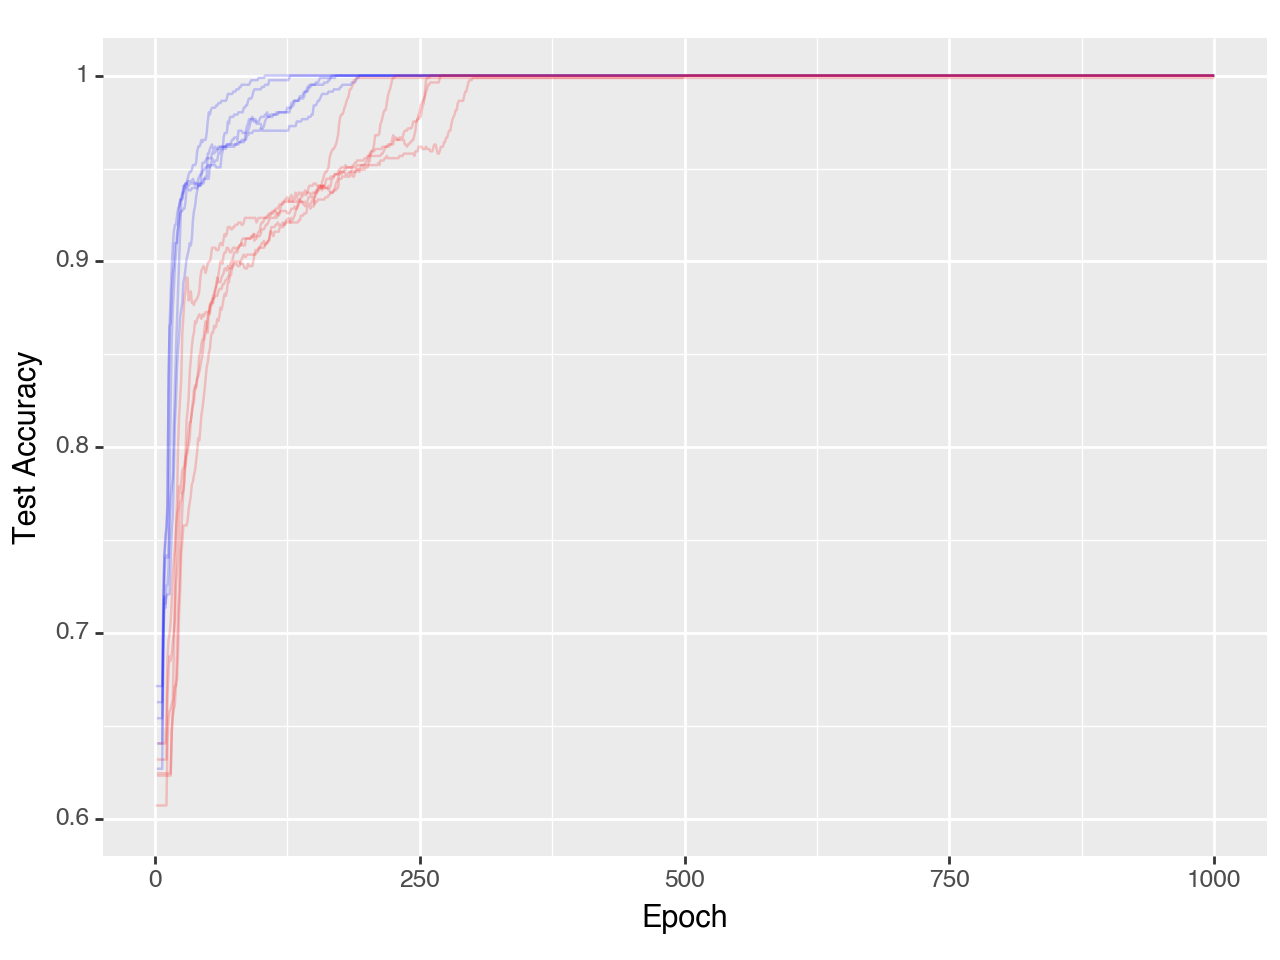

<Figure Size: (640 x 480)>

In [75]:
(
    pn.ggplot(df_1a, pn.aes(x="epoch", y="test_accuracies", group="seed"))
    + pn.geom_line(data=df_1a[df_1a["quantifier"] == "at_least_four"], alpha=0.2, color="blue")
    + pn.geom_line(df_1a[df_1a["quantifier"] == "at_least_six_or_at_most_two"],
    alpha=0.2, color="red")
    + pn.ylim(0.6, 1.)
    + pn.xlab("Epoch")
    + pn.ylab("Test Accuracy")
)

## Experiment 1b

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_35130/640708266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


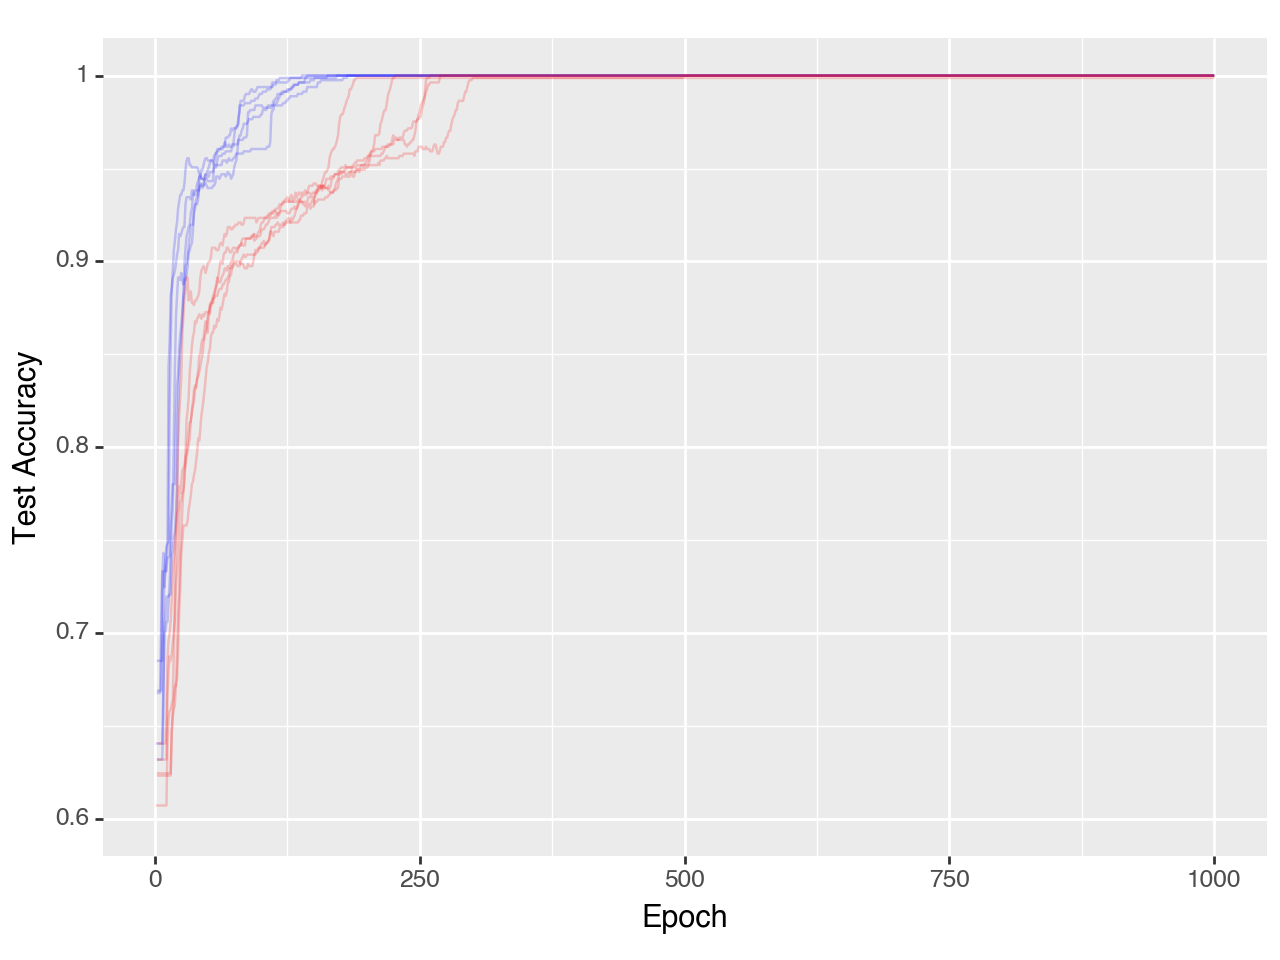

<Figure Size: (640 x 480)>

In [76]:
df_1b = all_data[all_data["quantifier"].isin(["at_least_six_or_at_most_two", "at_most_three"])]
df_1b["seed"] = df_1b["seed"].astype(str) # categorical legend

(
    pn.ggplot(df_1b, pn.aes(x="epoch", y="test_accuracies", group="seed"))
    + pn.geom_line(data=df_1b[df_1b["quantifier"] == "at_most_three"], alpha=0.2, color="blue")
    + pn.geom_line(df_1b[df_1b["quantifier"] == "at_least_six_or_at_most_two"],
    alpha=0.2, color="red")
    + pn.ylim(0.6, 1.)
    + pn.xlab("Epoch")
    + pn.ylab("Test Accuracy")
)

## Experiment 1c

The previous experiments have different minimal automata complexity, which could be the cause of the different learning curves.

In [ ]:
df_1c = all_data[all_data["quantifier"].isin(["at_least_six_or_at_most_two", "at_least_six"])]
df_1c["seed"] = df_1c["seed"].astype(str) # categorical legend

(
    pn.ggplot(df_1c, pn.aes(x="epoch", y="test_accuracies", group="seed"))
    + pn.geom_line(data=df_1c[df_1c["quantifier"] == "at_least_six"], alpha=0.2, color="blue")
    + pn.geom_line(df_1c[df_1c["quantifier"] == "at_least_six_or_at_most_two"],
    alpha=0.2, color="red")
    + pn.ylim(0.6, 1.)
    + pn.xlab("Epoch")
    + pn.ylab("Test Accuracy")
)

## Upshot: differences in learning automata cannot explain semantic universals

The result that `at_least_6` and `at_least_six_or_at_most_2` have the same learning curves shows that learning difficulty corresponds to minimal automaton complexity (num of states.) Next, we should visualize the automata.